# Imports and default parameters

In [2]:
import functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

tmax = 1000
L = 500
N = 0.13
vmax = 5
p = 0.2
acccelerations = [1, 2, 3, 4]

# Colourmaps for different acceleration values

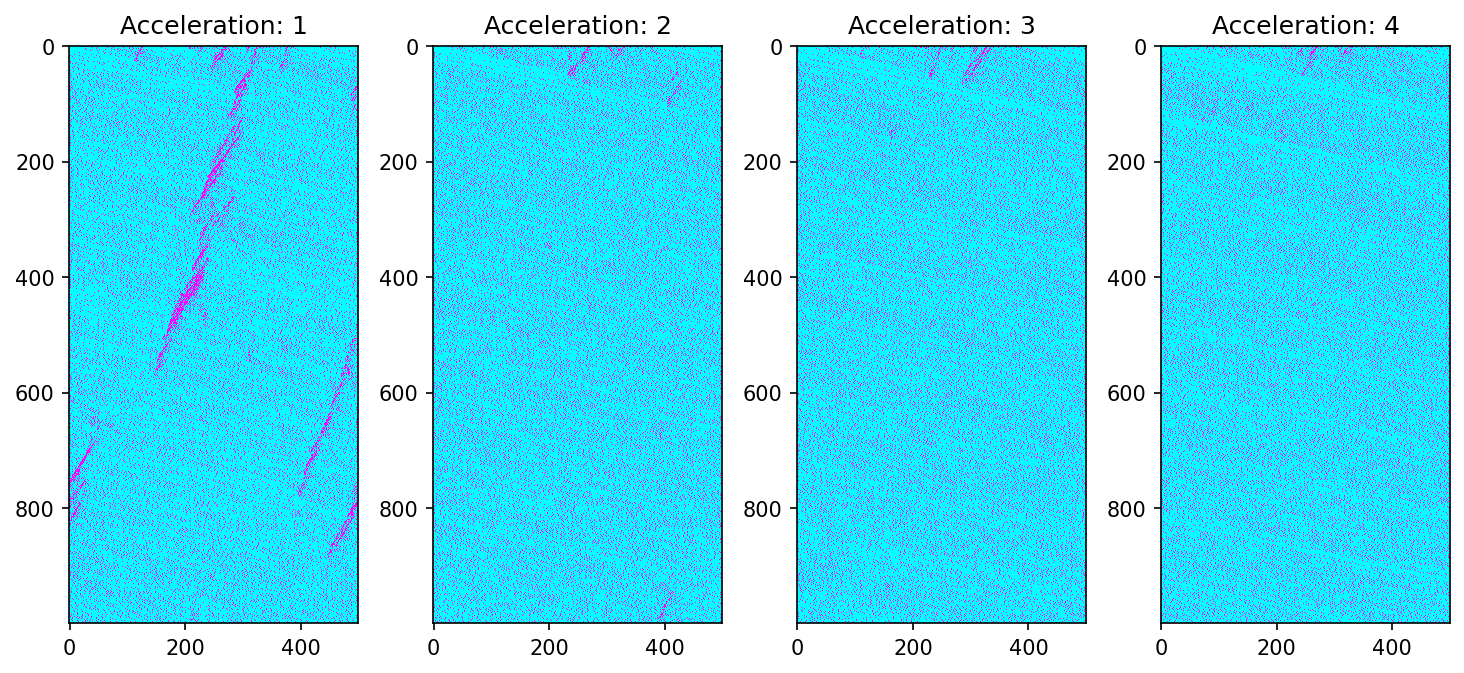

In [3]:
fig, axs = plt.subplots(1,len(acccelerations), figsize = (len(acccelerations)*3, 5), dpi=150)
for accel in acccelerations:
    simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax, max_acceleration=accel)
    simulation.run_model()
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation.positions[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[acccelerations.index(accel)].set_title(f'Acceleration: {accel}')
    axs[acccelerations.index(accel)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

# Average velocity/cells in clusters vs acceleration for different densities

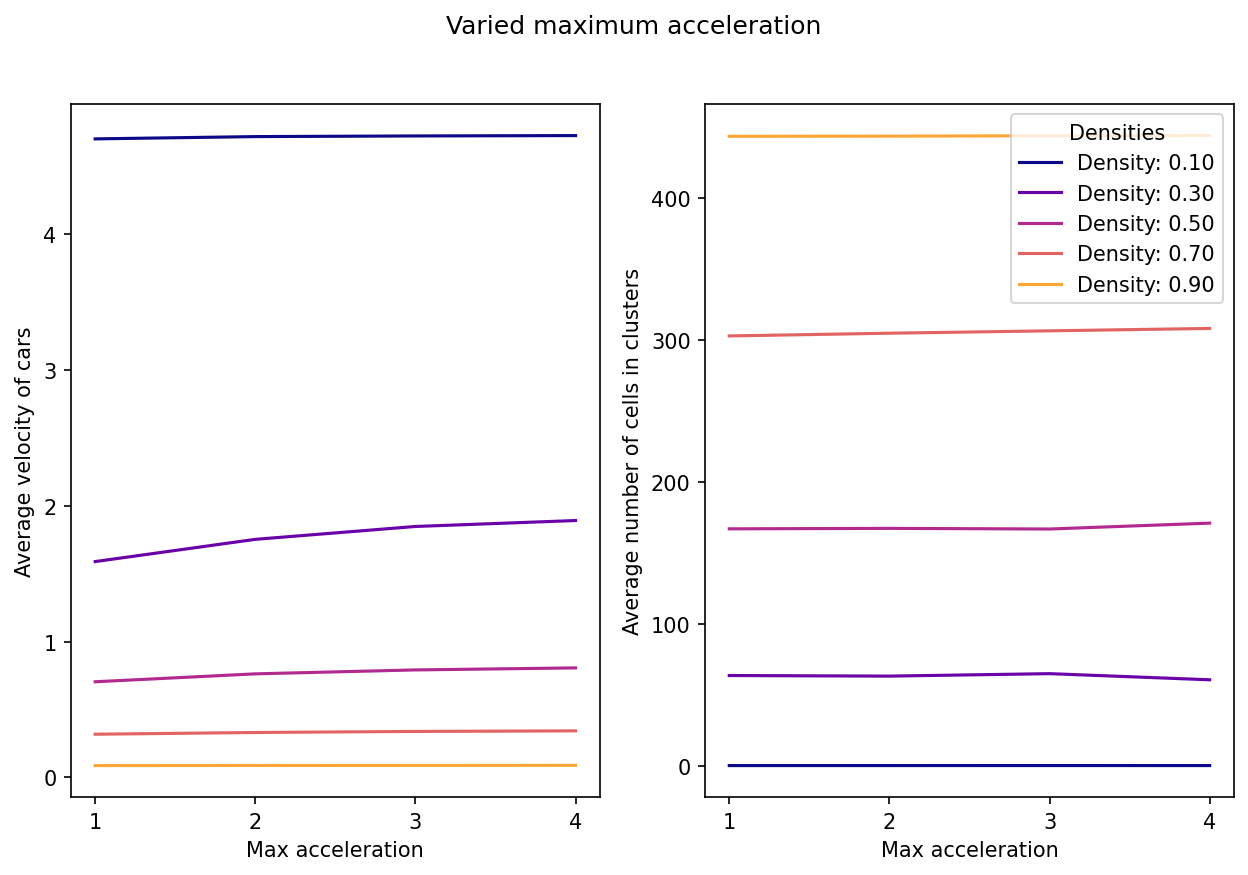

In [4]:
maximum_acceleration = np.arange(1, 5, 1)
densities = np.linspace(0.1, 0.9, 5)

velocity_averages = []
average_cells_in_clusters_per_density = []


for a in maximum_acceleration:
    for density in densities:
        
        simulation = functions.Nagel_Schreckenberg(L, int(L * density), vmax, p, tmax, max_acceleration = a)
        simulation.run_model()
        # Velocity calculations
        velocity_average = simulation.average_velocity()
        velocity_averages.append(velocity_average)

        # Cells in clusters calculations
        cells_in_clusters_list = simulation.clusters()[0]
        cells_cluster_average = np.mean(cells_in_clusters_list) 
        average_cells_in_clusters_per_density.append(cells_cluster_average)

        
# Reshape velocity_averages to match the shape of max_acceleration and densities
velocity_averages = np.array(velocity_averages).reshape(len(maximum_acceleration), len(densities))
average_cells_in_clusters_per_density = np.array(average_cells_in_clusters_per_density).reshape(len(maximum_acceleration), len(densities))


# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))

for i in range(len(densities)): # For each density
    colour = plt.cm.plasma(i / float(len(densities))) # Plotting the lines with gradients of colour

    axs[0].plot(maximum_acceleration, velocity_averages[:, i], color=colour, label=f'Density: {densities[i]:.2f}')
    axs[0].set_xticks(maximum_acceleration)
    axs[1].plot(maximum_acceleration, average_cells_in_clusters_per_density[:, i], color=colour, label=f'Density: {densities[i]:.2f}')
    axs[1].set_xticks(maximum_acceleration)

axs[0].set_xlabel('Max acceleration')
axs[0].set_ylabel('Average velocity of cars')
axs[1].set_xlabel('Max acceleration')
axs[1].set_ylabel('Average number of cells in clusters')
plt.suptitle('Varied maximum acceleration')
plt.legend(title='Densities')
plt.show()